In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants 
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
run_period = 'spring'
data_type = 'data'
df_pipkmks = tools.get_dataframe('pipkmks', run_period, data_type, )
df_pimkpks = tools.get_dataframe('pimkpks', run_period, data_type, )

In [3]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Filter('e_beam > 8.0 && e_beam < 9.0').Filter('mand_t < 0.5')
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Filter('e_beam > 8.0 && e_beam < 9.0').Filter('mand_t < 0.5')

In [4]:
hist_ppi_pipkmks = df_pipkmks.Histo1D(('pipkmks_ppi', 'M(p#pi^{+}) [GeV]', 50, 1.0, 3.0), 'ppip_m')
hist_ppi_pipkmks_f1 = df_pipkmks.Filter('pipkmks_m > 1.24 && pipkmks_m < 1.35').Histo1D(('pipkmks_ppi', 'M(p#pi^{+}) [GeV]', 50, 1.0, 3.0), 'ppip_m')
hist_ppi_pimkpks = df_pimkpks.Histo1D(('pimkpks_ppi', 'M(p#pi^{-}) [GeV]', 50, 1.0, 3.0), 'ppim_m')
hist_ppi_pimkpks_f1 = df_pimkpks.Filter('pimkpks_m > 1.24 && pimkpks_m < 1.35').Histo1D(('pimkpks_ppi', 'M(p#pi^{-}) [GeV]', 50, 1.0, 3.0), 'ppim_m')

print('pipkmks: ', hist_ppi_pipkmks_f1.Integral())
print('pimkpks', hist_ppi_pimkpks_f1.Integral())

pipkmks:  3265.0
pimkpks 3533.0


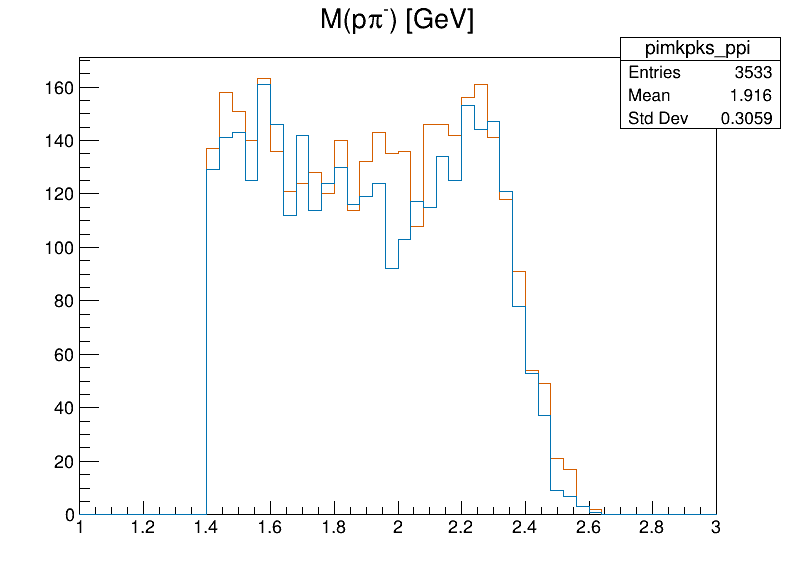

In [5]:
hist_ppi_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_ppi_pipkmks_f1.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_ppi_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
hist_ppi_pimkpks_f1.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

c = ROOT.TCanvas('c', 'c', 800, 600)
# hist_ppi_pimkpks.Draw()
hist_ppi_pimkpks_f1.Draw()
# hist_ppi_pipkmks.Draw('same')
hist_ppi_pipkmks_f1.Draw('same')
c.Draw()


In [6]:
hist_pipkmks = df_pipkmks.Filter('pipkmks_m > 1.24 && pipkmks_m < 1.35').Histo1D(('pipkmks', 'M(#pi^{+}K^{-}K^{0}_{S}) [GeV]', 40, 1.1, 1.5), 'pipkmks_m')
hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_pimkpks = df_pimkpks.Filter('pimkpks_m > 1.24 && pimkpks_m < 1.35').Histo1D(('pimkpks', 'M(#pi^{+}K^{-}K^{0}_{S}) [GeV]', 40, 1.1, 1.5), 'pimkpks_m')
hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))

print('pipkmks: ', hist_pipkmks.Integral())
print('pimkpks', hist_pimkpks.Integral())

pipkmks:  3265.0
pimkpks 3533.0


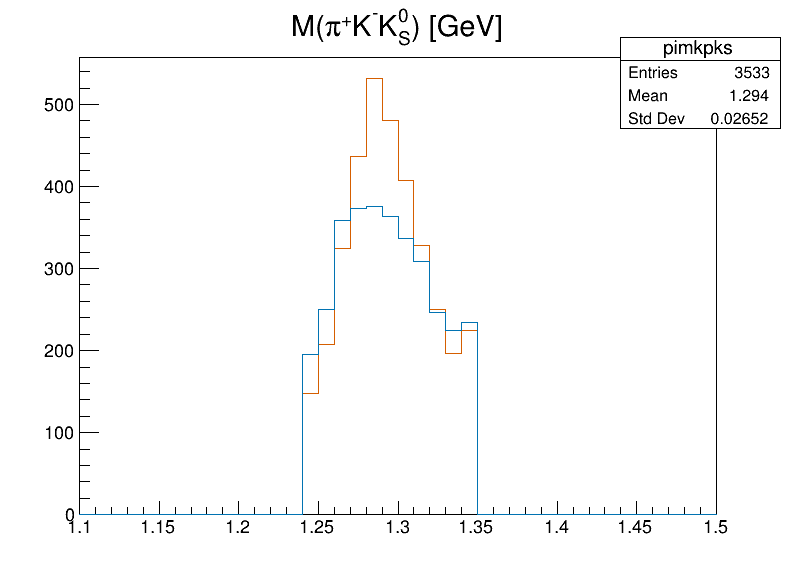

In [7]:
hist_pimkpks.Draw()
hist_pipkmks.Draw('same')
c.Draw()
